c:\Users\abdel\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\abdel\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


📊 Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.96      0.67      0.79       234
   PNEUMONIA       0.83      0.98      0.90       390

    accuracy                           0.87       624
   macro avg       0.89      0.83      0.85       624
weighted avg       0.88      0.87      0.86       624



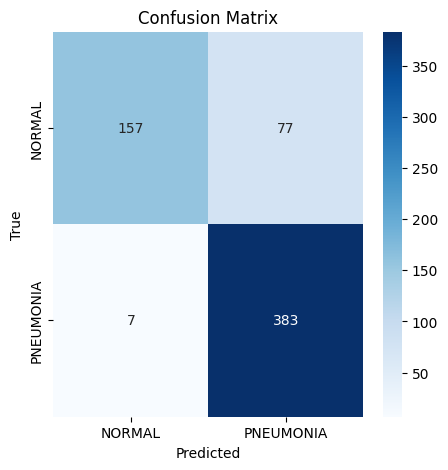

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision.models import ResNet18_Weights
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
data_dir = "../data/chest_xray"  # make sure you unzipped dataset here


# Test transform
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
test_data  = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=test_transforms)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Load trained model
weights = ResNet18_Weights.DEFAULT
# model = models.resnet18(weights=weights) we can also use this but we need to tune the model
model = models.resnet18(pretrained=False) # Depecrated
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model.load_state_dict(torch.load("src/models/pneumonia_resnet18.pt", map_location=device))
model = model.to(device)
model.eval()

# Evaluation
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification Report
print("📊 Classification Report:")
print(classification_report(all_labels, all_preds, target_names=test_data.classes))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_data.classes, yticklabels=test_data.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Milestone 4: Model Evaluation Notebook

This notebook will test the final saved model on the test set.
Here’s the code you can put in 04_model_evaluation.ipynb: